Edgar Ruiz Tovar

13 de junio de 2025, Querétaro, Qro.

# Laplace

Función original u(t)
exp(3*t)*Heaviside(t)
Transformada de Laplace de u(t)
1/(s - 3)


C:\Users\ed_22\AppData\Local\Temp\ipykernel_15696\158325041.py:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)


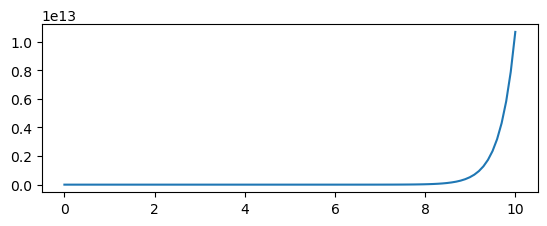

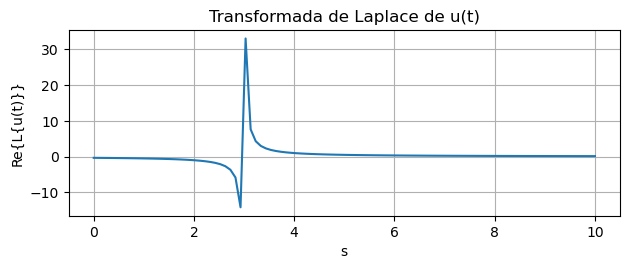

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

#Establecemos variables simbólicas
t, s= sp.symbols('t s')

#Definir la función a transformar
u_t=sp.exp(3*t)*sp.Heaviside(t)

#Encontramos la transformada de Laplace
laplace_u_t_tupla=sp.laplace_transform(u_t,t,s)
laplace_u_t=laplace_u_t_tupla[0] #Tomar la primera parte de la tupla

#Mostrando la función original y la transformada
print('Función original u(t)')
print(u_t)

print('Transformada de Laplace de u(t)')
print(laplace_u_t)

#Para graficar usamos la parte real
laplace_u_t_real=sp.re(laplace_u_t)

#Definir el rango de valores de t para graficar
t_vals=np.linspace(0,10,100)

#Evaluamos la función original en el rango de valores de t
u_t_vals=[u_t.subs(t,t_val) for t_val in t_vals]

#Definimos el rango de valores de s para graficar
s_vals=np.linspace(0,10,100)

#Evaluamos la transformada de Laplace en el rango de valores de s
laplace_u_t_real_vals=[laplace_u_t_real.subs(s,s_val) for s_val in s_vals]

#Mostrando las gráficas
plt.figure()

#Gráfica de la función original
plt.subplot(2,1,1)
plt.plot(t_vals,u_t_vals)
plt.figure('Función original u(t)')
plt.xlabel('Tiempo(t)')
plt.ylabel('u(t)')
plt.grid(True)

#Gráfica de la transformada de Laplace
plt.subplot(2,1,2)
plt.plot(s_vals,laplace_u_t_real_vals)
plt.title('Transformada de Laplace de u(t)')
plt.xlabel('s')
plt.ylabel('Re{L{u(t)}}')
plt.grid(True)

plt.tight_layout()
plt.show()

## Interpretación
Súper bien, hablemos de la transformada de Laplace. Mucho de lo que mencionaré ya lo había hecho antes, pero de igual manera ahí va.

La transformada de Laplace es una transformada integral la cual pasa un problema diferencial a un problema polinómico. ¿Esto por qué? Porque resolver ecuaciones polinómicas es mucho más sencillo que resolver ecuciones diferenciales. En mi experiencia puedo decir que casi todo al final queda como una integración por fracciones parciales. Esto está increíble, porque justamente esa es la forma para aplicar la transformada inversa y, entonces, tener resuelta nuestra ecuación diferencial.

Ahora bien, todo lo que conté hasta el momento es referente a ecuaciones diferenciales, pero esto se puede aplicar en otro tipo de problemas. El que más se me hace interesante es en Probabilidad para resolver convoluciones (suma de variables aleatorias).

En estas gráficas podemos ver la función exponencial original y posteriormente podemos ver cómo esta ecuación tiene ahora otra representación pues se aplicó la transformada.

# Resolver ED con Python

In [3]:
#Definir variables a trabajar y funciones simbólicas
t=sp.symbols('t')
L,R,C,Vs=sp.symbols('L R C VS', real=True)

i=sp.Function('i')(t)

#Expresar la ecuación diferencial
ecuacion_diff=sp.Eq(L*i.diff(t)+R*i,Vs)

#Resolver la ecuación diferencial
solucion_i=sp.dsolve(ecuacion_diff,i)

print(solucion_i)

#Vamos a sustituir los valores de los componentes, si son conocidos
L_valor=0.000001 #Valor de inductancia en Henrios
R_valor=1000 #Valor de resistencia en ohms
C_valor=0.0001 #Valor de la capacitancia en Faradios

Vs_valor=sp.sin(t)

solucion_i=solucion_i.subs({L:L_valor, R:R_valor, Vs:Vs_valor,C:C_valor})

#Visualizar la solución de i(t)
print('Solución de la corriente i(t): ')
print(solucion_i)

Eq(i(t), C1*exp(-R*t/L) + VS/R)
Solución de la corriente i(t): 
Eq(i(t), C1*exp(-1000000000.0*t) + sin(t)/1000)


## Interpretación
Aquí lo que veo es que se aplica el método `dsolve` del módulo `sympy` para resolver la ecuación diferencial propuesta.

La cosa es que esto nos dará un objeto de Python, por lo que necesitamos darle los valores para poder obtener un resultado numérico.

# Sistema dinámico

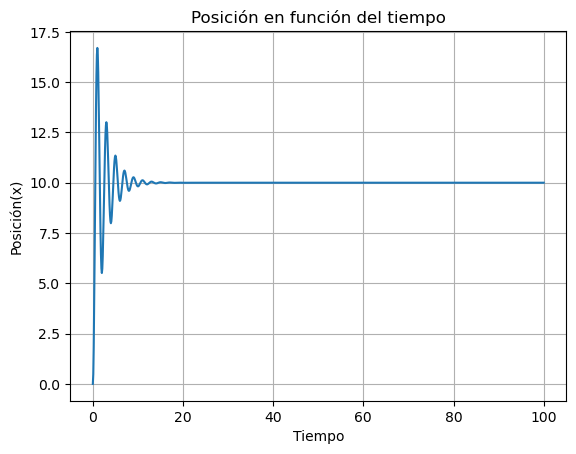

In [5]:
#Definir variables a trabajar y funciones simbólicas
t=sp.symbols('t')
x=sp.Function('x')

#Parámetros
m=1
b=0.8
k=10
F=100
v0=0

#Definir ecuación diferencial
Dx = sp.Derivative(x(t),t)
D2x=sp.Derivative(x(t),t,2)
ecuacion_diff=m*D2x+b*Dx+k*x(t)-F

#Resolviendo la EDO
x_solucion=sp.dsolve(sp.Eq(ecuacion_diff,0),x(t),ics={x(0):0,Dx.subs(t,0):v0})
solucion_num=sp.lambdify(t,x_solucion.rhs,'numpy')

#Crear un rango de valores temporales
t_num=np.linspace(0,100,1000)

#Evaluar la solución numérica
x_num=solucion_num(t_num)

#Graficar la solución
plt.plot(t_num,x_num)
plt.title('Posición en función del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Posición(x)')
plt.grid(True)
plt.show()

## Interpretación
Aquí, como en el ejecicio anterior, se resuelve la ecuación diferencial usando el módulo `sympy`.

Podemos ver que a la hora de definir la variable `ecuacion_diff` se le resta `F`, esto es para que quede iguala a cero y se pueda dar como una función a graficar.

En la gráfica podemos ver las oscilaciones que se van haciendo más pequeñas en el tiempo hasta que se estabilizan en 10.

# Preguntas
## Tema de tesis
Como mencionamos, la transformada de Laplace se puede aplicar a múltiples problemas siendo una herramienta muy útil cuando estamos trabajando en espacios complicados. Se me ocurre que esta se puede aplicar en el algorimo de Backpropagation transformando las derivadas de las funciones de activación en cada capa. Esto va a depender del tema a tratar, pero aún no lo he definido con mi asesor.
## ¿Qué aprendí?
Aprendí a usar el módulo `sympy` para aplicar la transformada de Laplace y también para resolver ED.